<a href="https://colab.research.google.com/github/DohaMahmoud1811/Spam_Message_Classification/blob/main/Spam_Message_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries:
import numpy as np
import pandas as pd

In [2]:
# Load our dataset:
df = pd.read_csv('spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# **1. Data Cleaning:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 columns:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Rename the columns:
df.rename(columns = {'v1': 'target', 'v2': 'message'}, inplace = True)

In [8]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Encode our target column:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [11]:
# We encoded our target (ham -> 0 and spam -> 1).
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check for missing values:
# We find that there are no missing values in both of the columns.
df.isnull().sum()

target     0
message    0
dtype: int64

In [13]:
# Check for duplicate values:
df.duplicated().sum()

403

In [14]:
# We drop duplicate values keeping the first unique element:
df = df.drop_duplicates(keep= 'first')

In [15]:
# Now there are no duplicate values anymore:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## **2. EDA:**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Our target:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

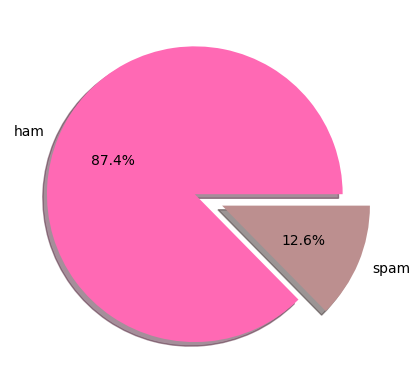

In [20]:
# Create a pie chart to represent our target:
# Note that our data is imblanced.
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], colors = ['hotpink', 'rosybrown'], autopct= '%1.1f%%', shadow = True, explode = [0, 0.2])
plt.show()

In [21]:
# NLTK (Natural Language Toolkit) contains a variety of libraries for various purposes like text classification, pasing, stemming, tokenizations.
# We use it here for tokenization.
import nltk

In [22]:
# In NLTK, PUNKT is an unsupervised trainable model, which means it can be trained on unlabeled data.
# It generates a list of sentences from a text by developing a model for words that start sentences, prepositional phrases, and abbreviations using
# an unsupervised technique.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Count the numbers of characters in each message:
df['num_characters'] = df['message'].apply(len)

In [24]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Count the numbers of words in each message:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Count the numbers of sentences in each message:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:

df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# Description:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Ham description:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Spam description:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

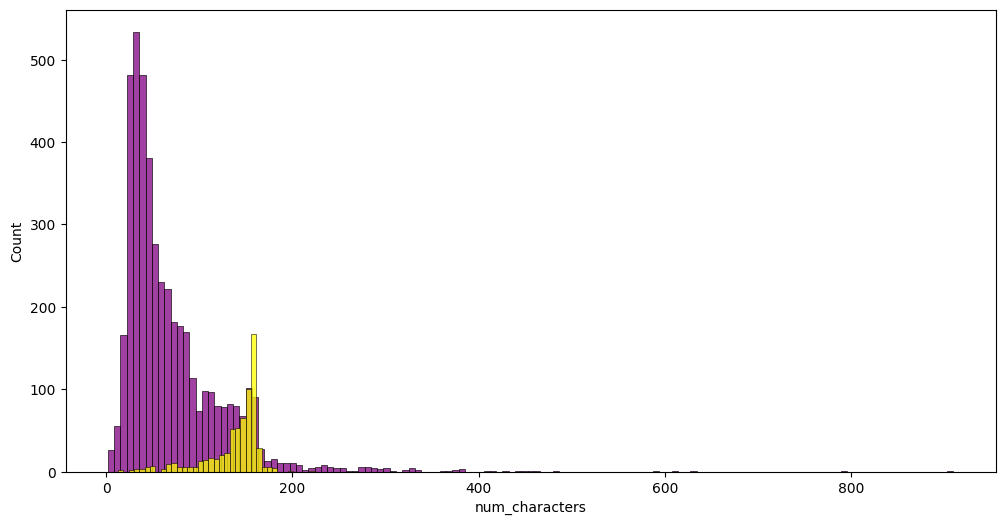

In [32]:
# Create a histogram to represent the frequency of the number of characters:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'purple')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'yellow')

<Axes: xlabel='num_words', ylabel='Count'>

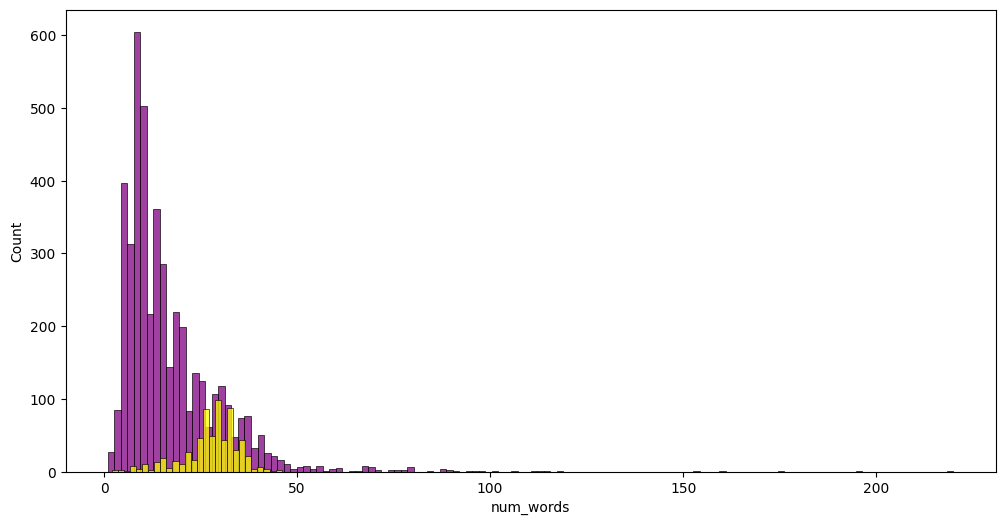

In [33]:
# Create a histogram to represent the frequency of the number of words:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color = 'purple')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'yellow')

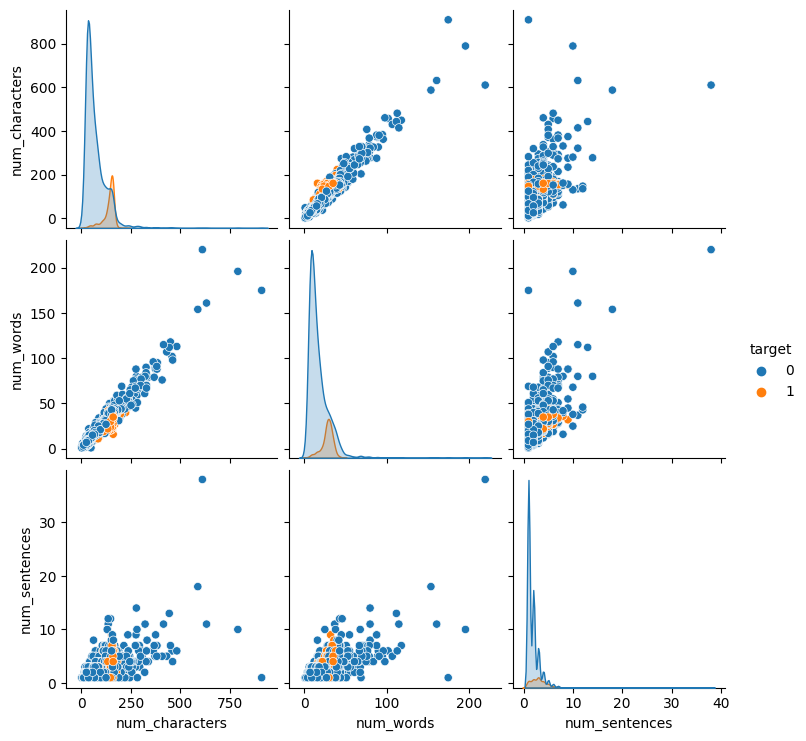

In [34]:
sns.pairplot(df,hue='target')

<ipython-input-35-1ea36b7fc8e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap = 'BuPu')


<Axes: >

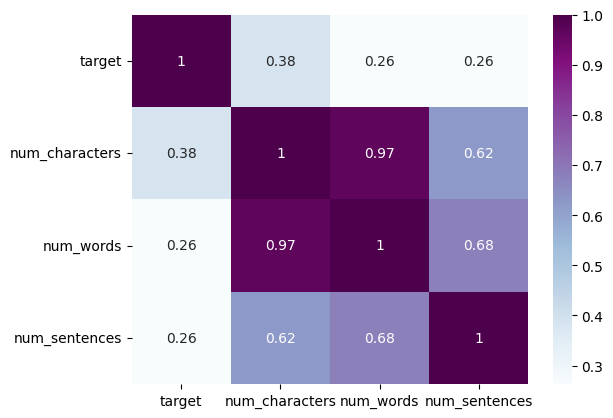

In [35]:
# Create a heatmap to represent the correlation between numerical features:
sns.heatmap(df.corr(),annot=True, cmap = 'BuPu')

# **3. Data Preprocessing:**

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Initialize our model for stemming:
stemmer = PorterStemmer()

In [38]:
# Our preproc
def preprocessing(message):

  # Converting words to lower case:
  text = message.lower()

  # Tokenization:
  text = nltk.word_tokenize(text)

  # Confirm that the  all of the characters are alphanumeric (alphabet letter (a-z) and numbers (0-9)):
  alphanum = [word for word in text if word.isalnum()]

  # Remove stop words and punctuation:
  nonstop = [word for word in alphanum if word not in stopwords.words('english') and word not in string.punctuation]

  # Stemming:
  stemmed = [stemmer.stem(word) for word in nonstop]

  # Final text:
  message = ' '.join(stemmed)

  return message

In [39]:
# Apply our function on the messages:
df['preprocessed_messages'] = df['message'].apply(preprocessing)

In [40]:
df.head()

,target,message,num_characters,num_words,num_sentences,preprocessed_messages
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
# WordCloud is a technique to show which words are the most frequent among the given text.
from wordcloud import WordCloud

In [42]:
# Our wordcloud:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

(-0.5, 499.5, 499.5, -0.5)

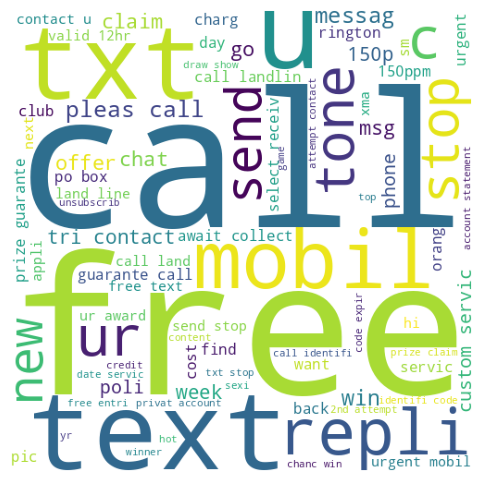

In [43]:
# create a wordcloud for spam messages:
spam_wc = wc.generate(df[df['target'] == 1]['preprocessed_messages'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

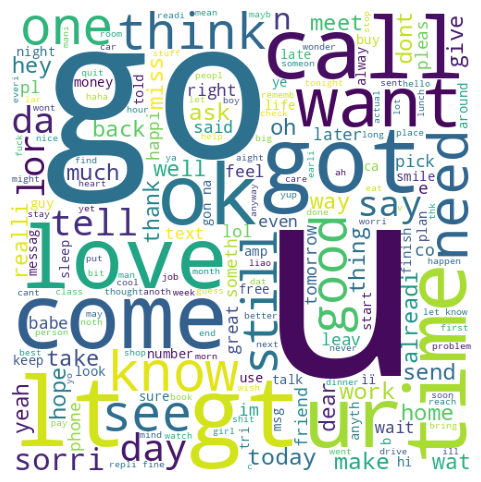

In [44]:
# create a wordcloud for ham messages:
spam_wc = wc.generate(df[df['target'] == 0]['preprocessed_messages'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

plt.axis("off")

## ***4. Model Building:***

In [45]:
# The numerical representation of (preprocessed_messages) column:
# We use Term Frequency - Inverse Document Frequency (TF-IDF):
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['preprocessed_messages']).toarray()

In [46]:
# Our feature matrix:
X.shape

(5169, 6708)

In [47]:
# Our target:
y = df['target']
y.shape

(5169,)

In [48]:
# Split our data:
# We use (train_test_split) to split the data into training set (80%) and test set (20%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

    X,
    y,
    test_size= 0.2,
    random_state= 2023,
    stratify = y
)

In [49]:
X_train.shape

(4135, 6708)

In [50]:
X_test.shape

(1034, 6708)

In [51]:
# Our models:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Our metrics to test accuracy of the models:
from sklearn.metrics import accuracy_score ,precision_score, confusion_matrix, classification_report
# Note that:
# Accuracy tells you how many times the ML model was correct overall.
# Precision is how good the model is at predicting a specific category.

In [52]:
# First: Gaussian Naive Bayes:

# Instantiate the model:
GNB = GaussianNB()

# Train the model:
GNB.fit(X_train, y_train)

# Test the model:
y_pred = GNB.predict(X_test)

# Accuracy score:
GNB_ac = accuracy_score(y_test, y_pred)

# Precision score:
GNB_pc = precision_score(y_test, y_pred)

# Check the accuracy of the model:
print('Accuracy score of the model: ', GNB_ac)
print('Precision score of the model: ', GNB_pc)
print('Confusion matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification report:\n ', classification_report(y_test, y_pred))

Accuracy score of the model:  0.8694390715667312
Precision score of the model:  0.4908256880733945
Confusion matrix:
  [[792 111]
 [ 24 107]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.88      0.92       903
           1       0.49      0.82      0.61       131

    accuracy                           0.87      1034
   macro avg       0.73      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [53]:
# Second: Multinomial Naive Bayes:

# Instantiate the model:
MnNB = MultinomialNB()

# Train the model:
MnNB.fit(X_train, y_train)

# Test the model:
y_pred = MnNB.predict(X_test)

# Accuracy score:
MnNB_ac = accuracy_score(y_test, y_pred)

# Precision score:
MnNB_pc = precision_score(y_test, y_pred)

# Check the accuracy of the model:
print('Accuracy score of the model: ', MnNB_ac)
print('Precision score of the model: ', MnNB_pc)
print('Confusion matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification report:\n ', classification_report(y_test, y_pred))

Accuracy score of the model:  0.9506769825918762
Precision score of the model:  1.0
Confusion matrix:
  [[903   0]
 [ 51  80]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       903
           1       1.00      0.61      0.76       131

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.95      1034



In [54]:
# Third: Bernoulli Naive Bayes:

# Instantiate the model:
BerNB = BernoulliNB()

# Train the model:
BerNB.fit(X_train, y_train)

# Test the model:
y_pred = BerNB.predict(X_test)

# Accuracy score:
BerNB_ac = accuracy_score(y_test, y_pred)

# Precision score:
BerNB_pc = precision_score(y_test, y_pred)

# Check the accuracy of the model:
print('Accuracy score of the model: ', BerNB_ac)
print('Precision score of the model: ', BerNB_pc)
print('Confusion matrix:\n ', confusion_matrix(y_test, y_pred))
print('Classification report:\n ', classification_report(y_test, y_pred))

Accuracy score of the model:  0.9622823984526112
Precision score of the model:  0.9509803921568627
Confusion matrix:
  [[898   5]
 [ 34  97]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98       903
           1       0.95      0.74      0.83       131

    accuracy                           0.96      1034
   macro avg       0.96      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [55]:
# We notice that Bernoulli Naive Bayes almost has the highest accuracy score.
models = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes']
accuracy = [GNB_ac, MnNB_ac, BerNB_ac]
precision = [GNB_pc, MnNB_pc, BerNB_pc]

scores = {
    'Accuracy': accuracy,
    'Precision': precision
}

scores_df = pd.DataFrame(scores, index = models).sort_values('Accuracy', ascending = False)
scores_df

,Accuracy,Precision
Bernoulli Naive Bayes,0.962282,0.950980
Multinomial Naive Bayes,0.950677,1.000000
Gaussian Naive Bayes,0.869439,0.490826


<Axes: title={'center': 'Model scores'}>

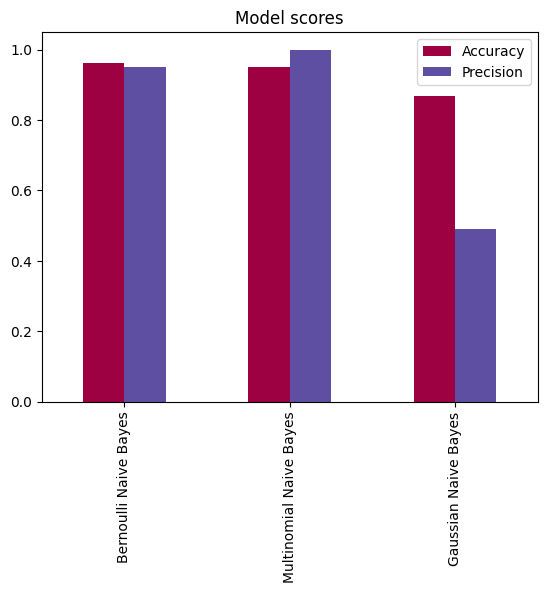

In [56]:
# plot grouped bar chart:
scores_df.plot(
        kind='bar',
        stacked=False,
        title='Model scores',
        colormap = 'Spectral'
)